# Imports


In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# SIR Model


In [ ]:
def SIR(N,I0,R0,beta,gamma,days=105):#105 days-15 weeks
  '''
  N- total Population
  I0- Initial No. of infected people
  R0- Initial No. of Recovered 
  beta-contact rate
  gamma- recovery rate
  days- no of days considered
  '''
  S0 = N - I0 - R0#intial no. of susceptipble people
  
  t = np.linspace(0, days, days)
  def deriv(y, t, N, beta, gamma):
      S, I, R = y
      dSdt = -beta * S * I / N
      dIdt = beta * S * I / N - gamma * I
      dRdt = gamma * I
      return dSdt, dIdt, dRdt
  y0 = S0, I0, R0#feature vector
  ret = odeint(deriv, y0, t, args=(N, beta, gamma))
  S, I, R = ret.T
  dIdt=beta * S * I / N - gamma * I
  print(S[-1],I[-1],R[-1])

  # Plot the data on three separate curves for S(t), I(t) and R(t)
  fig = plt.figure(facecolor='w')
  ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
  ax.plot(t, S/N*100, 'b', alpha=0.5, lw=2, label='Susceptible')
  ax.plot(t, I/N*100, 'r', alpha=0.5, lw=2, label='Infected')
  ax.plot(t, R/N*100, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
  ax.set_xlabel('Days')
  ax.set_ylabel('Percentage of Population')
  ax.set_ylim(-5,105)
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show()
  return dIdt

5014347500.240125 11667.92441137489 2885640831.8354588


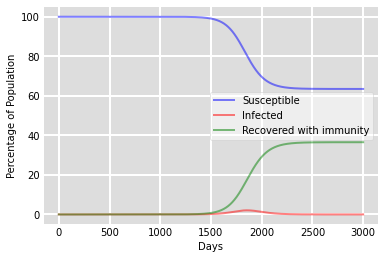

In [ ]:
dIdt=SIR(7900000000,1,0,0.056,.045,3000)#beta gamma algeria

In [ ]:
#main Model
S=['S0','S1','S2']
A=['Exceed Threshold','Policy On','Policy Off'] #'Policy On','Policy Off' have probabilities theta to switch states

In [ ]:
#POMDP
S=[]#based on variables(u1,u2,u3,u4,5)
A=[]#based on variables(u1,u2,u3,u4,5)
O=[]
T=[]
Z=[]
R=[]

In [ ]:
for el in dIdt:
  if el>0:
    print('state1')

  else:
    print('state2')
  


In [ ]:
S1=0
I1=0
R1=0
S2=0
I2=0
R2=0
sS=0
sI=0
n=0
sR=0
def SIR_dyn_bg(N,I0,R0,beta,gamma,days=105):#105 days-15 weeks
  '''
  N- total Population
  I0- Initial No. of infected people
  R0- Initial No. of Recovered 
  beta-contact rate
  gamma- recovery rate
  days- no of days considered
  '''
  S0 = N - I0 - R0#intial no. of susceptipble people
  
  t = np.linspace(0, days, days)
  b0=0
  g0=0
  def deriv(y, t, N, beta, gamma):
      S, I, R= y
      global S1
      global I1
      global R1
      global S2
      global I2
      global R2
      global sS
      global sI
      global sR
      global n
      
      n+=1 
      #print(n)
      
      S2=S1
      I2=I1
      R2=R1
      S1=S
      I1=I
      R1=R
      sS+=S
      sI+=I
      if n>700:
        #print('b')
        beta=N*(S2-S1)/(S1*I1)
        gamma=(R1-R2)/I1
        
               
      #else:
        #print('a')
      #print(beta)
      dSdt = -beta * S * I / N
      dIdt = beta * S * I / N - gamma * I
      dRdt = gamma * I   

      n+=1 
      
      S2=S1
      I2=I1
      R2=R1
      S1=S
      I1=I
      R1=R
      sS+=S
      sI+=I
    
      

      return dSdt, dIdt, dRdt,

  y0 = S0, I0, R0 #feature vector
  ret = odeint(deriv, y0, t, args=(N, beta, gamma))
  S, I, R = ret.T
  dIdt=beta * S * I / N - gamma * I
  print(S[-1],I[-1],R[-1])

  

  # Plot the data on three separate curves for S(t), I(t) and R(t)
  fig = plt.figure(facecolor='w')
  ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
  ax.plot(t, S/N*100, 'b', alpha=0.5, lw=2, label='Susceptible')
  ax.plot(t, I/N*100, 'r', alpha=0.5, lw=2, label='Infected')
  ax.plot(t, R/N*100, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
  ax.set_xlabel('Days')
  ax.set_ylabel('Percentage of Population')
  ax.set_ylim(-5,105)
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show()
  #return dIdt

5292566013.89032 64607775.895236224 2542826210.232428


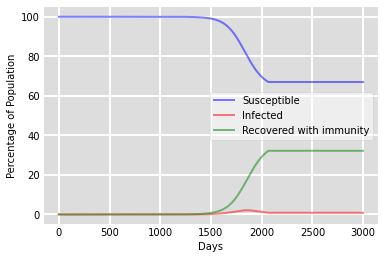

In [ ]:
SIR_dyn_bg(7900000000,1,0,0.056,.045,3000)

w/o dynamic beta gamma 
5014347500.240125 11667.92441137489 2885640831.8354588

with dynamuc beta/gamma 
5292566013.89032 64607775.895236224 2542826210.232428